# CSE428 Week 3 Coding Assignment

In [3]:
NAME = "Rubayet Bin Mujahid"
ID = "19241009"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [4]:
# Import libraries 

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from skimage import img_as_float,exposure
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import sobel_v, sobel_h, sobel
from skimage.util import random_noise

In [5]:
# Define helper functions
def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def gaussian_kernel(width=1, size=10):
    gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel/np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2
    
def plot_hist(I, nbins=256, normalize=True, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    
    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


In [6]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.
image = imread('sample.jpg') 
image = img_as_float(image)

In [7]:
# Define a gaussian kernel of size (35, 35)
k = 35
spread = k/3
kernel = gaussian_kernel(spread, size=k) 
kernel.shape

(35, 35)

In [8]:
# Determine the time to filter the image with the kernel using "direct" method

import time
 
start_time = time.clock()
filetred_image_direct = np.zeros(image.shape)
for i in range(image.shape[-1]):
  filetred_image_direct[:,:,i] = signal.correlate(image[:,:,i], kernel, mode='same', method='direct') 

print(time.clock() - start_time, "seconds")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


35.530593 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [9]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.clock()
filetred_image_fft  = np.zeros(image.shape)
for i in range(image.shape[-1]):
  filetred_image_fft[:,:,i] = signal.correlate(image[:,:,i], kernel, mode='same', method='fft') 
print(time.clock() - start_time, "seconds")

0.12125400000000042 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


In [11]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.
image = imread('sample.jpg') 
image = img_as_float(image)
image = resize(image, (512,512), anti_aliasing=True)

In [12]:
# Define any symmetric kernel of size (105, 105)
kernel_symmetric = np.full((105,105),0.5) # TO-BE-COMPLETED
kernel_symmetric.shape

(105, 105)

In [13]:
# Define any asymmetric kernel of size (105, 105)
kernel_asymmetric = np.random.uniform(low=1, high=5, size=(105,105)) # TO-BE-COMPLETED
kernel_asymmetric.shape

(105, 105)

In [14]:
# Filter the image with the symmetric kernel using the correlation function
filtered_image_symmetric = np.zeros(image.shape)
filtered_image_asymmetric = np.zeros(image.shape)

for i in range(image.shape[-1]):
  filtered_image_symmetric[:,:,i] = signal.correlate(image[:,:,i], kernel_symmetric, mode='same', method='auto')  
filtered_image_symmetric = filtered_image_symmetric/filtered_image_symmetric.max()
for i in range(image.shape[-1]):
  filtered_image_asymmetric[:,:,i] = signal.correlate(image[:,:,i], kernel_asymmetric, mode='same', method='auto') 
filtered_image_asymmetric = filtered_image_asymmetric/filtered_image_asymmetric.max()

(-0.5, 511.5, 511.5, -0.5)

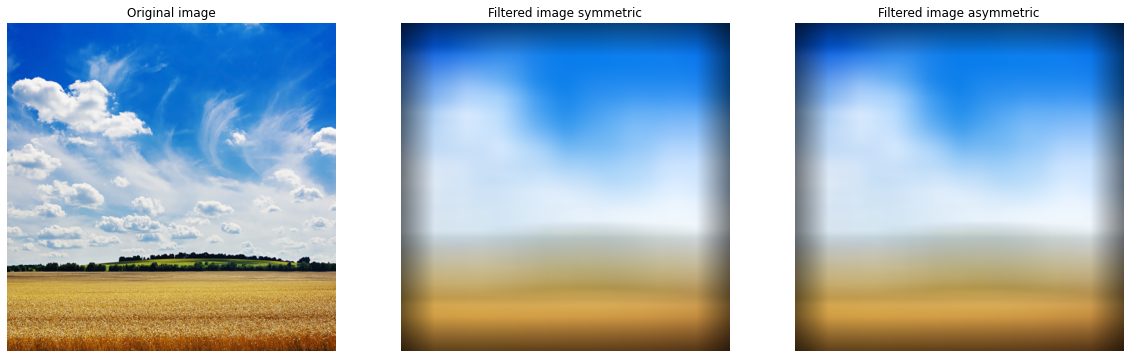

In [15]:
# Display the images side by side (with proper labeling, which is which)
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image) 
ax1.title.set_text('Original image')
ax1.axis("off")

ax1 = fig.add_subplot(1,3,2)
ax1.imshow(filtered_image_symmetric) 
ax1.title.set_text('Filtered image symmetric')
ax1.axis("off")
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(filtered_image_asymmetric) 
ax1.title.set_text('Filtered image asymmetric')
ax1.axis("off")

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

In [16]:
# Filter the image with the asymmetric kernel using the convolution function
filtered_image_symmetric = np.zeros_like(image)
filtered_image_asymmetric = np.zeros_like(image)
for i in range(image.shape[-1]):
  filtered_image_symmetric[:,:,i] = signal.convolve(image[:,:,i], kernel_symmetric, mode='same', method='auto')  
filtered_image_symmetric = filtered_image_symmetric/filtered_image_symmetric.max()
for i in range(image.shape[-1]):
  filtered_image_asymmetric[:,:,i] = signal.convolve(image[:,:,i], kernel_asymmetric, mode='same', method='auto')
filtered_image_asymmetric = filtered_image_asymmetric/filtered_image_asymmetric.max()

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.

(-0.5, 511.5, 511.5, -0.5)

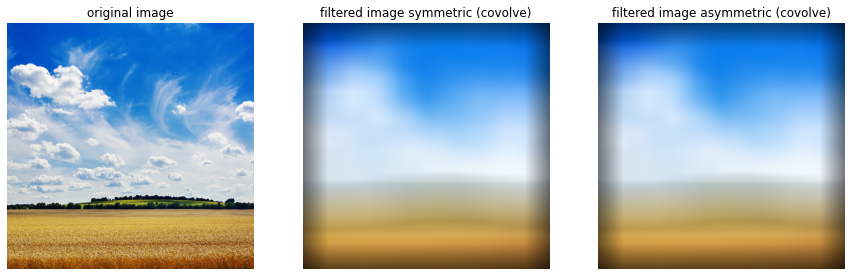

In [17]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image) 
ax1.title.set_text('original image')
ax1.axis("off")

ax1 = fig.add_subplot(1,3,2)
ax1.imshow(filtered_image_symmetric) 
ax1.title.set_text('filtered image symmetric (covolve)')
ax1.axis("off")
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(filtered_image_asymmetric) 
ax1.title.set_text('filtered image asymmetric (covolve)')
ax1.axis("off")

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

In [22]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image
image = imread('diamond2.jpg') 

In [31]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell
#horizontal
kernel_1 = np.array([[-5, -10, 0], 
                     [-5, 0, 10], 
                     [0, 10, 5]]) 
#vertical
kernel_2 = np.array([[0, -10, -5], 
                     [10, 0, -5], 
                     [5, 10, 0]]) 

(-0.5, 625.5, 625.5, -0.5)

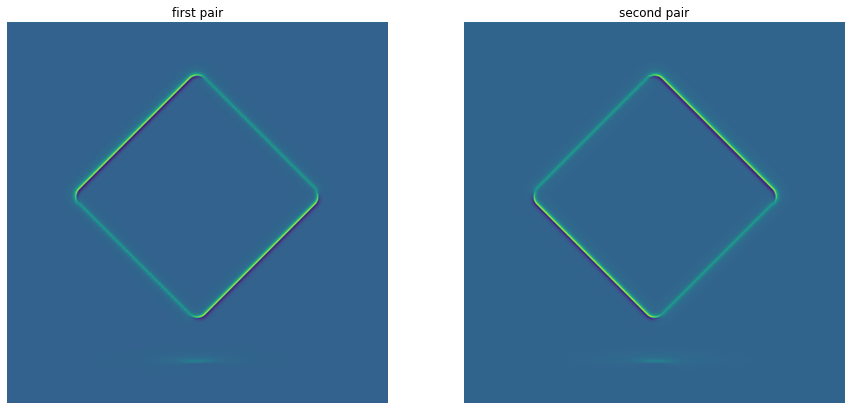

In [32]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

image_gray = rgb2gray(image)

first_pair_detected = signal.correlate(image_gray, kernel_1, mode='same', method='auto') 

# detect the second pair using image filtering with kernel_2

second_pair_detected = signal.correlate(image_gray, kernel_2, mode='same', method='auto') 

# plot the two filtered images side by side
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(first_pair_detected) 
ax1.title.set_text('first pair')
ax1.axis("off")

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(second_pair_detected) 
ax1.title.set_text('second pair')
ax1.axis("off")

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?


Keeping the diagonal 0 and the rest integers forms a kernel that can detect diagonal edges. The kernel is not unique as changing the non-zero values will provide a similar result.



## **The END**